# Script to evaluate model spatial prediction accuracy 

This script evaluates the overall and spatial accuacy of SWEMLv2.0

In [6]:
import os
import pandas as pd
import geopandas as gpd
import matplotlib
import warnings
import SSWEET

HOME = os.path.expanduser('~')


In [ ]:
#Model run
dates = [
         '2015-04-06', #Conejos - only one obs, likely poor Never seen prediction location
           '2016-03-29', #Olympic
         '2015-04-07', #upper Rio Grande
         '2013-04-29', #Tuolumne
          '2018-03-30', #Taylor
         '2018-03-31', #East
          '2015-04-12', #Kings
          '2019-03-25' #San Joaquin
         ]

output_res = '300M_Resolution'
DataFrame = 'Vegetation_Sturm_Seasonality_PrecipVIIRSGeoObsDFs'
fSCA_thresh = '20_fSCA_Thresh'
date = '2019-03-25'
region = 'Sierra Nevada'
watershed = 'San Joaquin'

#Prediction path
Ppath = f"{HOME}/SWEMLv2.0/Predictions/{DataFrame}/{output_res}/{fSCA_thresh}"

#Load data
#EvalDF = pd.read_parquet(f"{Ppath}/All_Feats_HoldOut_03-29-2019.parquet")
EvalDF = pd.read_parquet(f"{Ppath}/0SWEthresh_All_Feats_HoldOut_{date}.parquet")

#Change obs/pred column names if necessary
EvalDF.rename(columns={'ASO_swe_cm':'y_test','XGBoost_swe_cm':'y_pred'}, inplace=True)

#Parity Plot
savfig = True
Performance = SSWEET.parityplot(EvalDF, savfig, region, watershed, date)
Performance


#Error vs Elevation
SSWEET.Model_Vs(EvalDF,'Elevation_m', 'Error', savfig, region, watershed, date)

#spatial
cmap = 'seismic' # use seismic for error, viridis or blues for preds/obs
var =  'y_error' #'error'
var_short = 'Error'
Title = f'SWEMLv2.0 Model {var_short} {date} \n {watershed} River Basin, {region}'
savfig = True
variant = 'World_Imagery'
figname = f"./Figures/{region}_{watershed}_spatial_{var}_{date}"


SSWEET.SpatialAnalysis(EvalDF, 5, cmap, var,Title, savfig, variant, figname)

Performance

ValueError: max() arg is an empty sequence

## Parity Plot

A parity plot is a scatterplot that compares a set of model estimates against benchmark data, i.e., the observations. Each point has coordinates (x, y), where x is a benchmark value and y is the corresponding value from the model. A parity plot is often the first visualization to investigate the skill of a model.

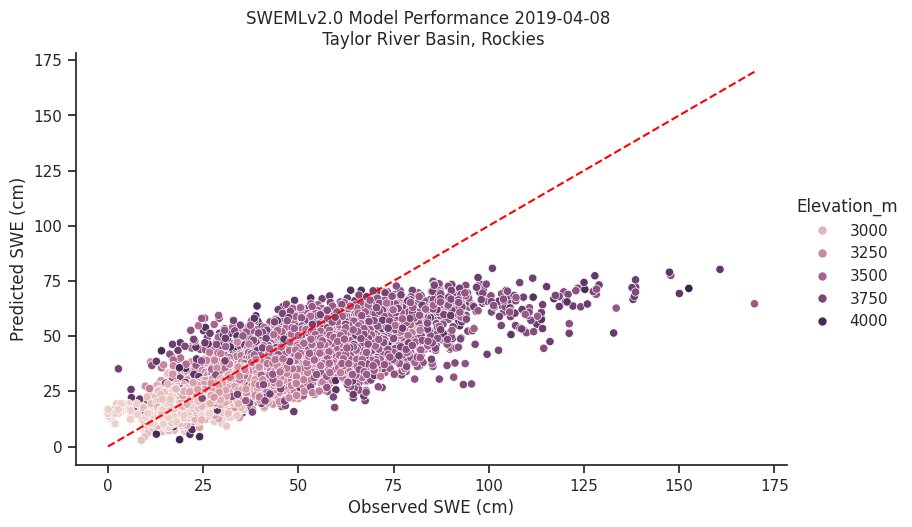

,R2,RMSE,KGE,PBias,R2_fSCA,RMSE_fSCA,KGE_fSCA,PBias_fSCA
0,0.6,13.03,0.61,14.26,0.6,13.03,0.61,14.26


In [22]:
savfig = True

Performance = SSWEET.parityplot(EvalDF, savfig, region, watershed, date)
Performance

input_columns = [
            'cen_lat',	
            'cen_lon',	
            'Elevation_m',	
            'Slope_Deg',	
            'Aspect_Deg',	
            'ns_1',	
            'ns_2',	
            'ns_3',	
            'ns_4',	
            'ns_5',	
            #'ns_6',	
            'VIIRS_SCA', 
            'hasSnow',
            'season_precip_cm',
            'region_class',
            'DOS', 
            'WY_week',
            'ns_1_week_mean', 
            'ns_2_week_mean', 
            'ns_3_week_mean', 
            'ns_4_week_mean',
            'ns_5_week_mean', 
            #'ns_6_week_mean', 
            'Seasonal_ns_1_rel',
            'Seasonal_ns_2_rel',
            'Seasonal_ns_3_rel', 
            'Seasonal_ns_4_rel',
            'Seasonal_ns_5_rel', 
            #'Seasonal_ns_6_rel',
            'sturm_value',
           # 'vegetation_value'
]

input_columns = [
            'cen_lat',	
            'cen_lon',	
            'Elevation_m',	
            'Slope_Deg',	
            'Aspect_Deg',	
            'ns_1',	
            'ns_2',	
            'ns_3',	
            'ns_4',	
            'ns_5',	
            #'ns_6',	
            #'VIIRS_SCA', 
            'hasSnow',
            'season_precip_cm',
            'region_class',
            'DOS', 
            'WY_week',
            'ns_1_week_mean', 
            'ns_2_week_mean', 
            'ns_3_week_mean', 
            'ns_4_week_mean',
            'ns_5_week_mean', 
            #'ns_6_week_mean', 
            'Seasonal_ns_1_rel',
            'Seasonal_ns_2_rel',
            'Seasonal_ns_3_rel', 
            'Seasonal_ns_4_rel',
            'Seasonal_ns_5_rel', 
            #'Seasonal_ns_6_rel',
            'sturm_value',
            
]

## Percent Error compared to elevation
*note, error greater than |100%| is adjusted to |100%|

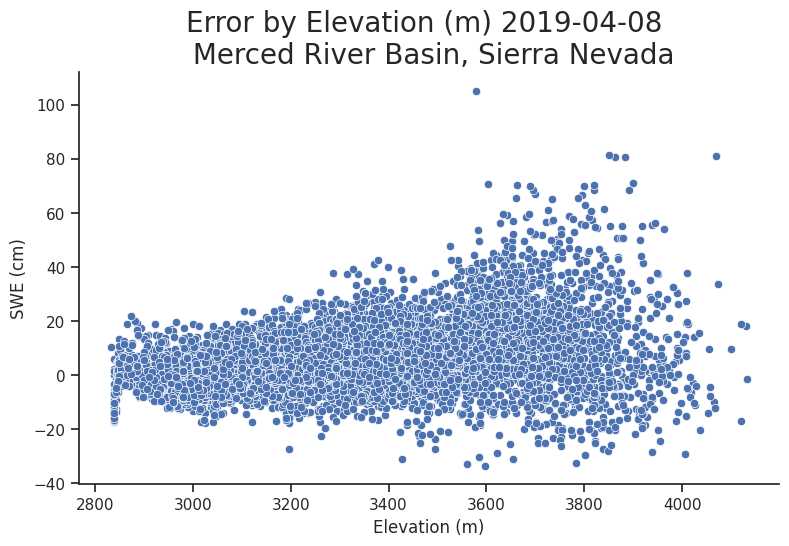

In [24]:
savfig = True
region = 'Sierra Nevada'
watershed = 'Merced'

SSWEET.Model_Vs(EvalDF,'Elevation_m', 'Error', savfig, region, watershed, date)

# Spatial Evaluation of the Model

Error = observations - predictions


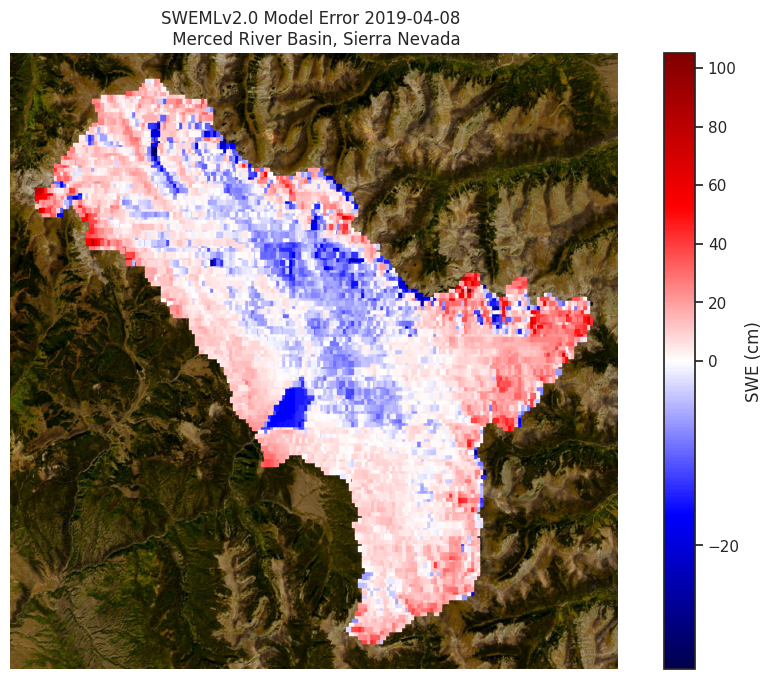

In [25]:
cmap = 'seismic' # use seismic for error, viridis or blues for preds/obs
var =  'y_error' #'error'
var_short = 'Error'
Title = f'SWEMLv2.0 Model {var_short} {date} \n {watershed} River Basin, {region}'
savfig = True
variant = 'World_Imagery'
figname = f"./Figures/{region}_{watershed}_spatial_{var}_{date}"


SSWEET.SpatialAnalysis(EvalDF, 10, cmap, var,Title, savfig, variant, figname)

In [46]:
#File path
Ppath = f"{HOME}/SWEMLv2.0/data/ASO/Southwest/300M_SWE_parquet"

#Load data
ASOdf = pd.read_parquet(f"{Ppath}/ASO_300M_SWE_20190317.parquet")

ASOdf['swe_m'] = ASOdf['swe_m']*100
ASOdf['y_pred'] = 0
ASOdf['y_test'] = 0
ASOdf.head()

,cen_lat,cen_lon,swe_m,cell_id,y_pred,y_test
12587,36.724735,-118.931971,0.0,Southwest_300M_36.725_-118.932,0,0
12588,36.724735,-118.929271,0.0,Southwest_300M_36.725_-118.929,0,0
12589,36.724735,-118.926571,0.0,Southwest_300M_36.725_-118.927,0,0
12591,36.724735,-118.921171,0.0,Southwest_300M_36.725_-118.921,0,0
12592,36.724735,-118.918471,0.0,Southwest_300M_36.725_-118.918,0,0


In [23]:
ASOdf = ASOdf[ASOdf['swe_m']>0.01]

In [44]:
import importlib
importlib.reload(SSWEET)

<module 'SSWEET' from '/home/whitelightning450/SWEMLv2.0/Evaluation/SSWEET.py'>

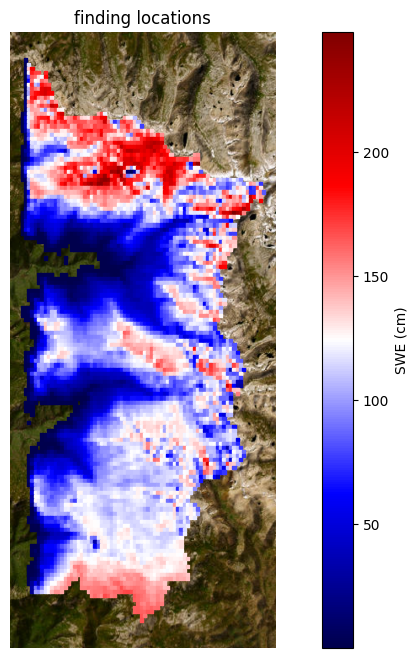

In [45]:
cmap = 'seismic' # use seismic for error, viridis or blues for preds/obs
var =  'swe_m' #'error'
Title = 'finding locations'
savfig = False
variant = 'World_Imagery'
figname = 'findlocation'

SSWEET.SpatialAnalysis(ASOdf, cmap, var,Title, savfig, variant, figname)

In [37]:
EvalDF

,cell_id,Date,cen_lat,cen_lon,Elevation_m,Slope_Deg,Aspect_Deg,ns_1,ns_2,ns_3,...,Seasonal_ns_4_rel,Seasonal_ns_5_rel,Seasonal_ns_6_rel,sturm_value,vegetation_value,swe_cm,region,region_class,y_test,y_pred
